# Dataset Size Experiment Metrics Visualization

This notebook creates visualizations for various metrics across different dataset sizes from the experiment results.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = [15, 25]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.grid'] = True

In [21]:
df = pd.read_csv('../data/ds_raport.csv')
df['dataset_size'] = df['Name'].str.extract('dataset_size_(\d+)').astype(int)
df = df.sort_values('dataset_size')
metric_cols = ['val_recall', 'val_precision', 'val_f1', 
               'val_mcc', 'val_jaccard', 'val_kappa', 
               'val_acc']

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/media/mateusz/DATA/tmp/ipykernel_48747/737149312.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['dataset_size'] = df['Name'].str.extract('dataset_size_(\d+)').astype(int)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

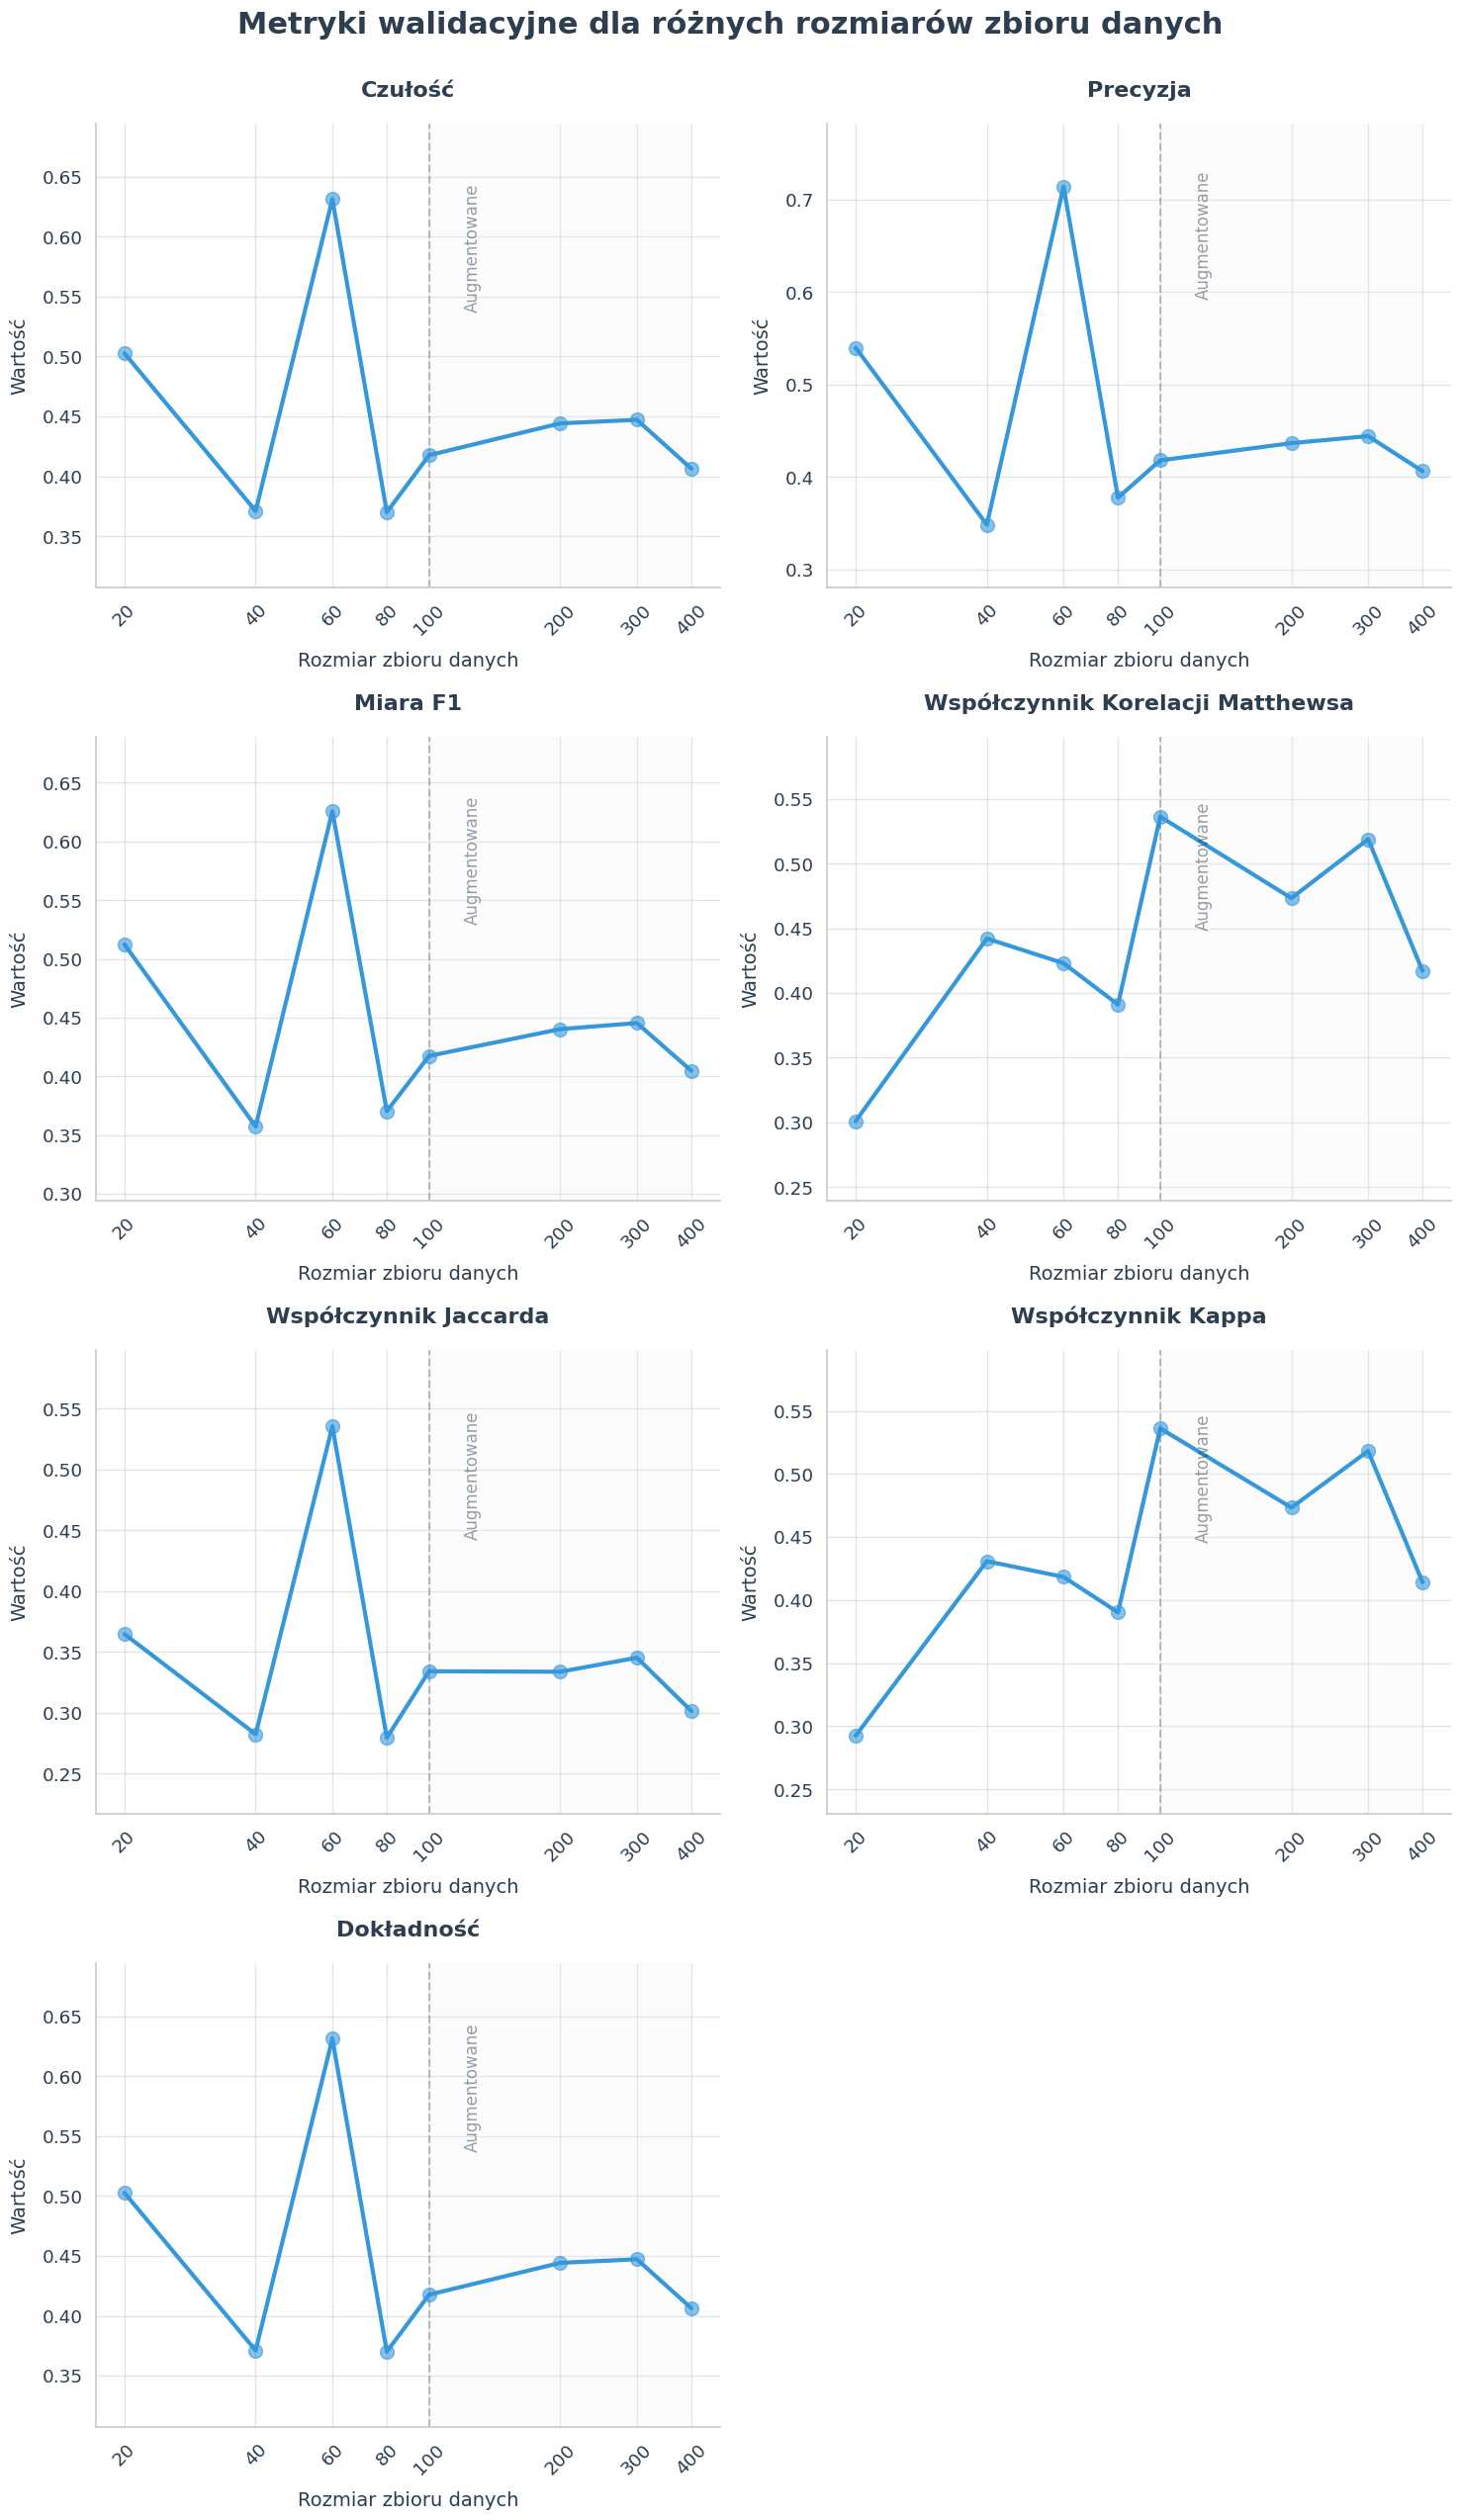

In [22]:
n_metrics = len(metric_cols)
n_cols = 2
n_rows = int(np.ceil(n_metrics / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))
axes = axes.flatten()

line_color = '#3498db'
augmented_color = '#ecf0f1'
text_color = '#2c3e50'

polish_names = {
    'val_recall': 'Czułość',
    'val_precision': 'Precyzja',
    'val_f1': 'Miara F1',
    'val_mcc': 'Współczynnik Korelacji Matthewsa',
    'val_jaccard': 'Współczynnik Jaccarda',
    'val_kappa': 'Współczynnik Kappa',
    'val_acc': 'Dokładność'
}

for idx, metric in enumerate(metric_cols):
    ax = axes[idx]
    
    ax.axvspan(100, df['dataset_size'].max(), alpha=0.15, 
               color=augmented_color)
    
    ax.plot(df['dataset_size'], df[metric], '-', linewidth=3, 
            color=line_color, solid_capstyle='round')
    
    ax.scatter(df['dataset_size'], df[metric], color=line_color, s=100, 
               alpha=0.6, zorder=5)
    
    ax.axvline(x=100, color=text_color, linestyle='--', alpha=0.3)
    
    ax.text(120, ax.get_ylim()[1], 'Augmentowane', rotation=90, 
            verticalalignment='top', alpha=0.5, color=text_color,
            fontsize=12)
    
    ax.set_title(polish_names[metric], pad=20, color=text_color, fontweight='bold')
    ax.set_xlabel('Rozmiar zbioru danych', labelpad=10, color=text_color)
    ax.set_ylabel('Wartość', labelpad=10, color=text_color)
    
    ax.set_xscale('log')
    ax.set_xticks(df['dataset_size'])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.tick_params(axis='x', rotation=45, colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    
    ax.grid(True, alpha=0.2, color='gray')
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.05, ymax + 0.05)

for idx in range(n_metrics, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

fig.suptitle('Metryki walidacyjne dla różnych rozmiarów zbioru danych', 
             fontsize=22, y=1.02, color=text_color, fontweight='bold')

plt.show()